In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A. Two-Body Problem


In [2]:
def acceleration(r1, r2, m1, m2, G):
    """
    Compute gravitational accelerations on m1 and m2 using Newton's law.
    """
    r = r2 - r1
    dist = np.linalg.norm(r)
    force = G * m1 * m2 * r / dist**3  # Newton's law: F = G * m1 * m2 / r^2 in vector form

    acc1 = +force / m1  # a = F / m
    acc2 = -force / m2  # equal and opposite

    return acc1, acc2

In [3]:
def velocity_verlet_adaptive_step(r1, v1, r2, v2, m1, m2, G, tau_0):
    """
    Perform one adaptive step of the Velocity-Verlet integration.
    Returns new r1, v1, r2, v2, and the adaptive time step tau_n.
    """
    # Compute current acceleration
    a1, a2 = acceleration(r1, r2, m1, m2, G)

    # Compute adaptive time step based on acceleration magnitude
    acc_magnitude = np.linalg.norm(a1) + np.linalg.norm(a2)
    tau_n = tau_0 / (1 + acc_magnitude)

    # First half of the Velocity-Verlet step
    r1_new = r1 + v1 * tau_n + 0.5 * a1 * tau_n**2
    r2_new = r2 + v2 * tau_n + 0.5 * a2 * tau_n**2

    # Compute new acceleration
    a1_new, a2_new = acceleration(r1_new, r2_new, m1, m2, G)

    # Second half of the Velocity-Verlet step
    v1_new = v1 + 0.5 * (a1 + a1_new) * tau_n
    v2_new = v2 + 0.5 * (a2 + a2_new) * tau_n

    return r1_new, v1_new, r2_new, v2_new, tau_n

def initialize_perturbed_velocity_verlet(a=0.5, delta_v=np.array([0.0, 0.00])):
    """
    Set up initial conditions for a perturbed two-body system.
    delta_v: small perturbation added to velocity of mass 1, default is 0
    """
    m1 = 1
    m2 = m1/a
    #normalise masses
    temp = m1 + m2
    m1 = m1/temp
    m2 = m2/temp

    r1 = np.array([1.0, 0.0])
    v1 = np.array([0.0, 2 - np.sqrt(3)]) + delta_v

    r2 = - (m1 / m2) * r1
    v2 = - (m1 / m2) * v1

    return r1, v1, r2, v2, m1, m2

## Question A1: Velocity Verlet and Stability Analysis

### i. 

The equations that descrive the two-body motion under Newtonian gravity. Note that $\mathbf{r} = \mathbf{r_2} - \mathbf{r_1}$

\begin{equation}
    \mathbf{F}_1 = Gm_1m_2 \frac{\mathbf{r}}{r^3}
\end{equation}

\begin{equation}
    \mathbf{F}_2 = -Gm_1m_2 \frac{\mathbf{r}}{r^3}
\end{equation}

So:
\begin{equation}
    \mathbf{a}_1 = Gm_2 \frac{\mathbf{r}}{r^3}
\end{equation}

\begin{equation}
    \mathbf{a}_2 = -Gm_1 \frac{\mathbf{r}}{r^3}
\end{equation}

The velocity verlet method is,

\begin{equation}
    \mathbf{r}_{i,n+1} = \mathbf{r}_{i,n} + \tau \mathbf{v}_{i,n} + \frac{1}{2} \tau^2 \mathbf{a}_{i,n}
\end{equation}

\begin{equation}
    \mathbf{v}_{i,n+1} = \mathbf{v}_{i,n} + \frac{1}{2} \tau (\mathbf{a}_{i,n} + \mathbf{a}_{i,n+1})
\end{equation}

### ii. Implemented Velocity-verlet method below:

In [ ]:
def velocity_verlet(a=0.5,  tau_0=0.05, T = 25 * 2 * np.pi):
    
    t = 0 #keeps track of time gone
    r1, v1, r2, v2, m1, m2 = initialize_perturbed_velocity_verlet(a)
    G = 1

    r1s = [r1,] #array of positions
    r2s = [r2,] 
    v1s = [v1,] #array of velocities
    v2s = [v2,]

    tau_ns = []
    timesteps = [0,] #discrete time steps, the between each dt is not the same

    while t <= T: #loops through until total integration time is met
        r1, v1, r2, v2, tau_n = velocity_verlet_adaptive_step(r1, v1, r2, v2, m1, m2, G, tau_0)
        #step for each timestep
        r1s.append(r1)
        v1s.append(v1)
        
        r2s.append(r2)
        v2s.append(v2)
        
        t += tau_n
        timesteps.append(t)
        tau_ns.append(tau_n)

    
    #makes everything inot array
    r1s = np.array(r1s)
    r2s = np.array(r2s)

    v1s = np.array(v1s)
    v2s = np.array(v2s)
    
    timesteps = np.array(timesteps)
    tau_ns = np.array(tau_ns)
    return r1s, r2s, v1s, v2s, m1, m2, timesteps, tau_ns


### iii. Plots are given by cell outputs below:

(-30.0, 30.0)

<Figure size 640x480 with 0 Axes>

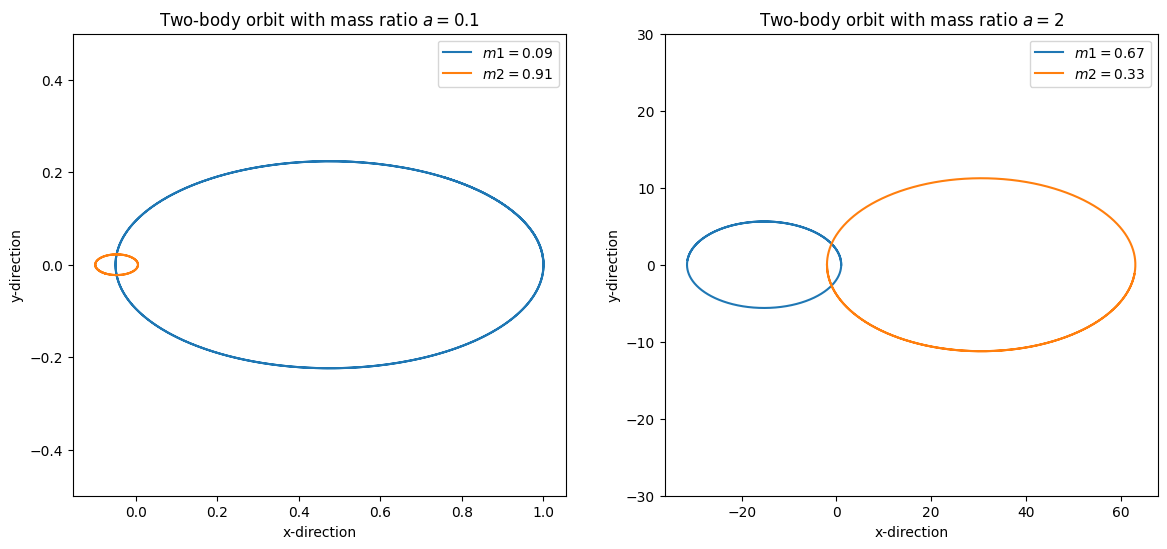

In [5]:
plt.clf()
a = 0.1

#code tp plot orbit trajectories, will plot m1 and m2 on same plot for each a

r1s, r2s, v1s, v2s, m1, m2, timesteps, tau_ns = velocity_verlet(a, T = 2*np.pi)
G = 1

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].plot(r1s[:, 0], r1s[:, 1], label = f"$m1={m1:.2f}$")
axes[0].plot(r2s[:, 0], r2s[:, 1], label = f"$m2={m2:.2f}$")
axes[0].set_xlabel("x-direction")
axes[0].set_ylabel("y-direction")
axes[0].set_title(f"Two-body orbit with mass ratio $a = {a}$")
axes[0].legend()
axes[0].set_ylim(-0.5, 0.5)

a = 2
r1s, r2s, v1s, v2s, m1, m2, timesteps, tau_ns = velocity_verlet(a, T = 1000*np.pi) 
#integration time is higher to complete orbit
axes[1].plot(r1s[:, 0], r1s[:, 1], label = f"$m1={m1:.2f}$")
axes[1].plot(r2s[:, 0], r2s[:, 1], label = f"$m2={m2:.2f}$")
axes[1].set_xlabel("x-direction")
axes[1].set_ylabel("y-direction")
axes[1].set_title(f"Two-body orbit with mass ratio $a = {a}$")
axes[1].legend()
axes[1].set_ylim(-30, 30)


Text(0.5, 1.0, '$\\tau_n$ vs time in orbit with mass ratio $a = 2$')

<Figure size 640x480 with 0 Axes>

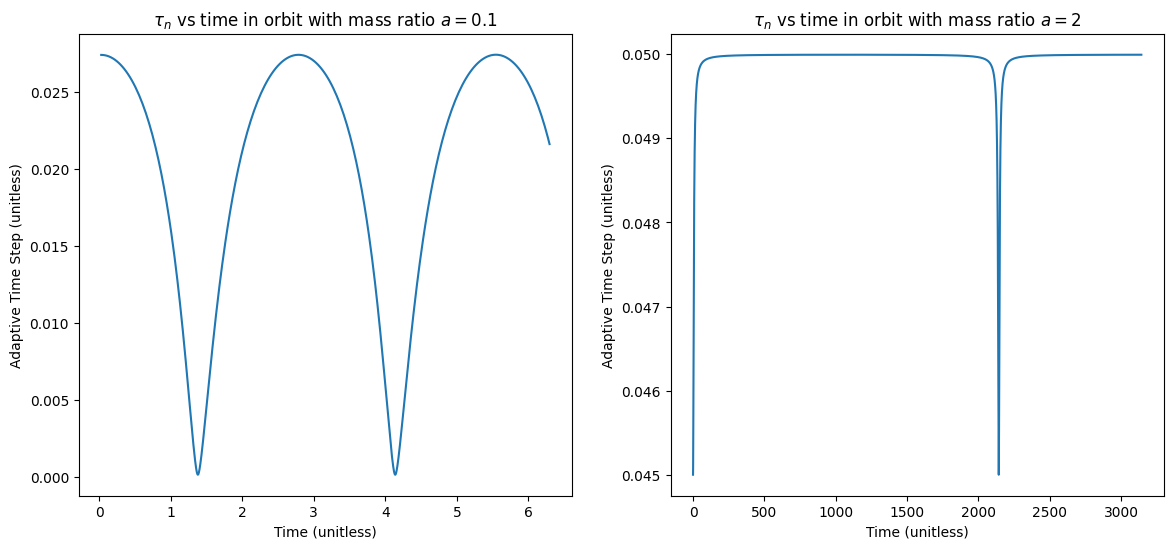

In [6]:
plt.clf()
#code to plot adaptive time step for each a
a = 0.1

r1s, r2s, v1s, v2s, m1, m2, timesteps, tau_ns = velocity_verlet(a, T = 2*np.pi)
G = 1

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].plot(timesteps[1:], tau_ns)
axes[0].set_xlabel("Time (unitless)")
axes[0].set_ylabel("Adaptive Time Step (unitless)")
axes[0].set_title(f"$\\tau_n$ vs time in orbit with mass ratio $a = {a}$")


a = 2
r1s, r2s, v1s, v2s, m1, m2, timesteps, tau_ns = velocity_verlet(a, T = 1000*np.pi)
axes[1].plot(timesteps[1:], tau_ns)
axes[1].set_xlabel("Time (unitless)")
axes[1].set_ylabel("Adaptive Time Step (unitless)")
axes[1].set_title(f"$\\tau_n$ vs time in orbit with mass ratio $a = {a}$")

Text(0.5, 1.0, '$y$ vs $p_y$ for $a = 2$')

<Figure size 640x480 with 0 Axes>

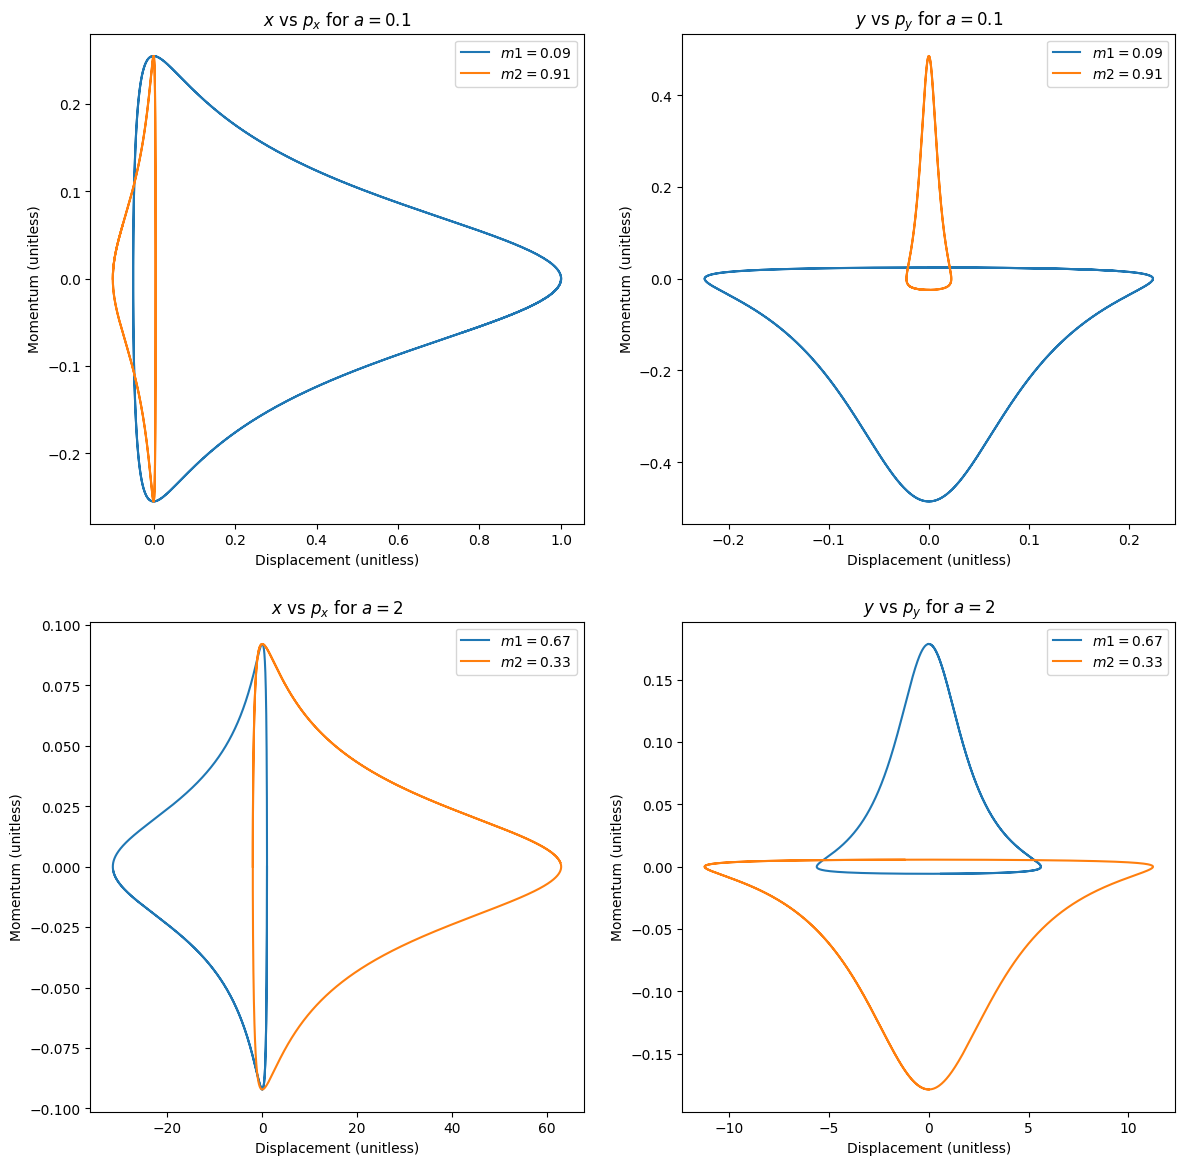

In [7]:
plt.clf()
#code to plot phase plots. x vs Px, y vs py, for each mass and a

a = 0.1
r1s, r2s, v1s, v2s, m1, m2, timesteps, tau_ns = velocity_verlet(a, T = 2*np.pi)
G = 1

fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes[0, 0].plot(r1s[:, 0], m1*v1s[:, 0], label=f"$m1={m1:.2f}$")
axes[0, 0].plot(r2s[:, 0], m2*v2s[:, 0], label=f"$m2={m2:.2f}$")
axes[0, 0].legend()
axes[0, 0].set_xlabel("Displacement (unitless)")
axes[0, 0].set_ylabel("Momentum (unitless)")
axes[0, 0].set_title(f"$x$ vs $p_x$ for $a = {a}$")

axes[0, 1].plot(r1s[:, 1], m1*v1s[:, 1], label=f"$m1={m1:.2f}$")
axes[0, 1].plot(r2s[:, 1], m2*v2s[:, 1], label=f"$m2={m2:.2f}$")
axes[0, 1].legend()
axes[0, 1].set_xlabel("Displacement (unitless)")
axes[0, 1].set_ylabel("Momentum (unitless)")
axes[0, 1].set_title(f"$y$ vs $p_y$ for $a = {a}$")

a = 2
r1s, r2s, v1s, v2s, m1, m2, timesteps, tau_ns = velocity_verlet(a, T = 1000*np.pi)
G = 1

axes[1, 0].plot(r1s[:, 0], m1*v1s[:, 0], label=f"$m1={m1:.2f}$")
axes[1, 0].plot(r2s[:, 0], m2*v2s[:, 0], label=f"$m2={m2:.2f}$")
axes[1, 0].legend()
axes[1, 0].set_xlabel("Displacement (unitless)")
axes[1, 0].set_ylabel("Momentum (unitless)")
axes[1, 0].set_title(f"$x$ vs $p_x$ for $a = {a}$")

axes[1, 1].plot(r1s[:, 1], m1*v1s[:, 1], label=f"$m1={m1:.2f}$")
axes[1, 1].plot(r2s[:, 1], m2*v2s[:, 1], label=f"$m2={m2:.2f}$")
axes[1, 1].legend()
axes[1, 1].set_xlabel("Displacement (unitless)")
axes[1, 1].set_ylabel("Momentum (unitless)")
axes[1, 1].set_title(f"$y$ vs $p_y$ for $a = {a}$")

### iv. 

Relative error for a=0.1: 969.6207224092683%

Relative error for a=2: 93.9419215975055%

In [8]:
a=0.1
G = 1
r1s, r2s, v1s, v2s, m1, m2, timesteps, tau_ns = velocity_verlet(a, T = 2*np.pi)

r = r2s - r1s #distance between two points
r = np.linalg.norm(r, axis = 1)
energy = 0.5 * m1 * (v1s[:, 0]**2 + v1s[:, 1]**2) - G*m1*m2/r # U=T+V = kinetic + potential
energy += 0.5 * m2 * (v2s[:, 0]**2 + v2s[:, 1]**2) - G*m1*m2/r #total energy of system
energy_error = np.abs((energy - energy[0]) / energy[0])
print(f"The maximum relative error in the total energy for a={a}: {np.max(energy_error)*100}%")

a=2
G = 1
r1s, r2s, v1s, v2s, m1, m2, timesteps, tau_ns = velocity_verlet(a, T = 1000*np.pi)

r = r2s - r1s
r = np.linalg.norm(r, axis = 1)
energy = 0.5 * m1 * (v1s[:, 0]**2 + v1s[:, 1]**2) - G*m1*m2/r # U=T+V = kinetic + potential
energy += 0.5 * m2 * (v2s[:, 0]**2 + v2s[:, 1]**2) - G*m1*m2/r #total energy of system
energy_error = np.abs((energy - energy[0]) / energy[0])
print(f"The maximum relative error in the total energy for a={a}: {np.max(energy_error)*100}%")



The maximum relative error in the total energy for a=0.1: 969.6207224092683%
The maximum relative error in the total energy for a=2: 93.9419215975055%


## Question A2: Symplectic Euler Analysis and Implementation

### i. 

The Symplectic Euler method is a numerical integration scheme used when you want to conserve energy long term. Unlike standard euler (explicit), it conserves the geometric structure of the hamiltonian (and thus energy), making it well suited for problems such as 2 body problem.

Using the same equations of motion from A1, we write the symplectic method:
\begin{equation}
    \mathbf{v}_{i,n+1} = \mathbf{v}_{i,n} + \tau \mathbf{a}_{i,n}
\end{equation}

\begin{equation}
    \mathbf{x}_{i,n+1} = \mathbf{x}_{i,n} + \tau \mathbf{v}_{i,n+1}
\end{equation}

In [10]:
def symplectic_euler_step(r1, v1, r2, v2, m1, m2, G, dt):
    """
    Perform one step of the Symplectic Euler method for two-body motion.
    Update velocities first, then positions.
    """
    # Compute acceleration at current positions
    a1, a2 = acceleration(r1, r2, m1, m2, G)

    # Update velocities
    v1_new = v1 + dt * a1
    v2_new = v2 + dt * a2

    # Update positions using updated velocities
    r1_new = r1 + dt * v1_new
    r2_new = r2 + dt * v2_new

    return r1_new, v1_new, r2_new, v2_new

def initialize_perturbed_symplectic_euler(a=0.5, delta_v=np.array([0.005, 0.0])):
    """
    Initialise perturbed positions for Symplectic Euler method.
    """
    # removing this as for a > 1, one of these will be negative which can't happen
    # m1 = a
    # m2 = 1 - a
    
    m1 = 1
    m2 = m1/a
    
    #normalise masses
    temp = m1 + m2
    m1 = m1/temp
    m2 = m2/temp

    r1 = np.array([1.0, 0.0])
    v1 = np.array([0.0, 2 - np.sqrt(3)]) +delta_v

    r2 = - (m1 / m2) * r1
    v2 = - (m1 / m2) * v1

    return r1, v1, r2, v2, m1, m2

### ii.

Orbital Trajectories: Orbits become more eccentric when we deviate from a = 1 (in either direction). For a > 1 (a=2 in this case), m1 now seems to orbit to the left of the y-axis (and the orbit is larger), while for a < 1 m1 orbits to the right (and the orbit is smaller).

Energy drift: As a increases, the thickness of each peak increases. However, the magnitude of these drops decrease with increasing a. 

Phase space: For all a, the x vs px plot for m1 can be gotten by stretching/shrinking the same plot for m2 horizontally, and then flipping it by the momentum axis. A similar thing can be said for y vs py plots. For a = 1, the plots look alot more rounded, and as you go further away from a = 1, the shape of phase spaces $i$ vs $p_i$ gets more narrow and "stretches" in a certain direction.

In [11]:
def symplectic_euler(a, tau, T, delta_v):
    #tau = 0.001 #set low tau for accurate results, even at tau=0.05 it messes up if T is too long
    #T = 10*np.pi #integration time
    numSteps = int(np.ceil(T/tau))
    
    #delta_v = np.array([0, 0]) #perturbation in v
    r1, v1, r2, v2, m1, m2 = initialize_perturbed_symplectic_euler(a, delta_v)
    # assuming a is normalised mass ratio
    G = 1

    r1s = [r1,]
    r2s = [r2,]
    v1s = [v1,]
    v2s = [v2,]

    for n in range(numSteps):
        r1, v1, r2, v2 = symplectic_euler_step(r1, v1, r2, v2, m1, m2, G, tau)
        #step for each timestep until integration time is hit
        r1s.append(r1)
        v1s.append(v1)
        
        r2s.append(r2)
        v2s.append(v2)
        
    r1s = np.array(r1s)
    r2s = np.array(r2s)

    v1s = np.array(v1s)
    v2s = np.array(v2s)
    return r1s, v1s, r2s, v2s, m1, m2

<Figure size 640x480 with 0 Axes>

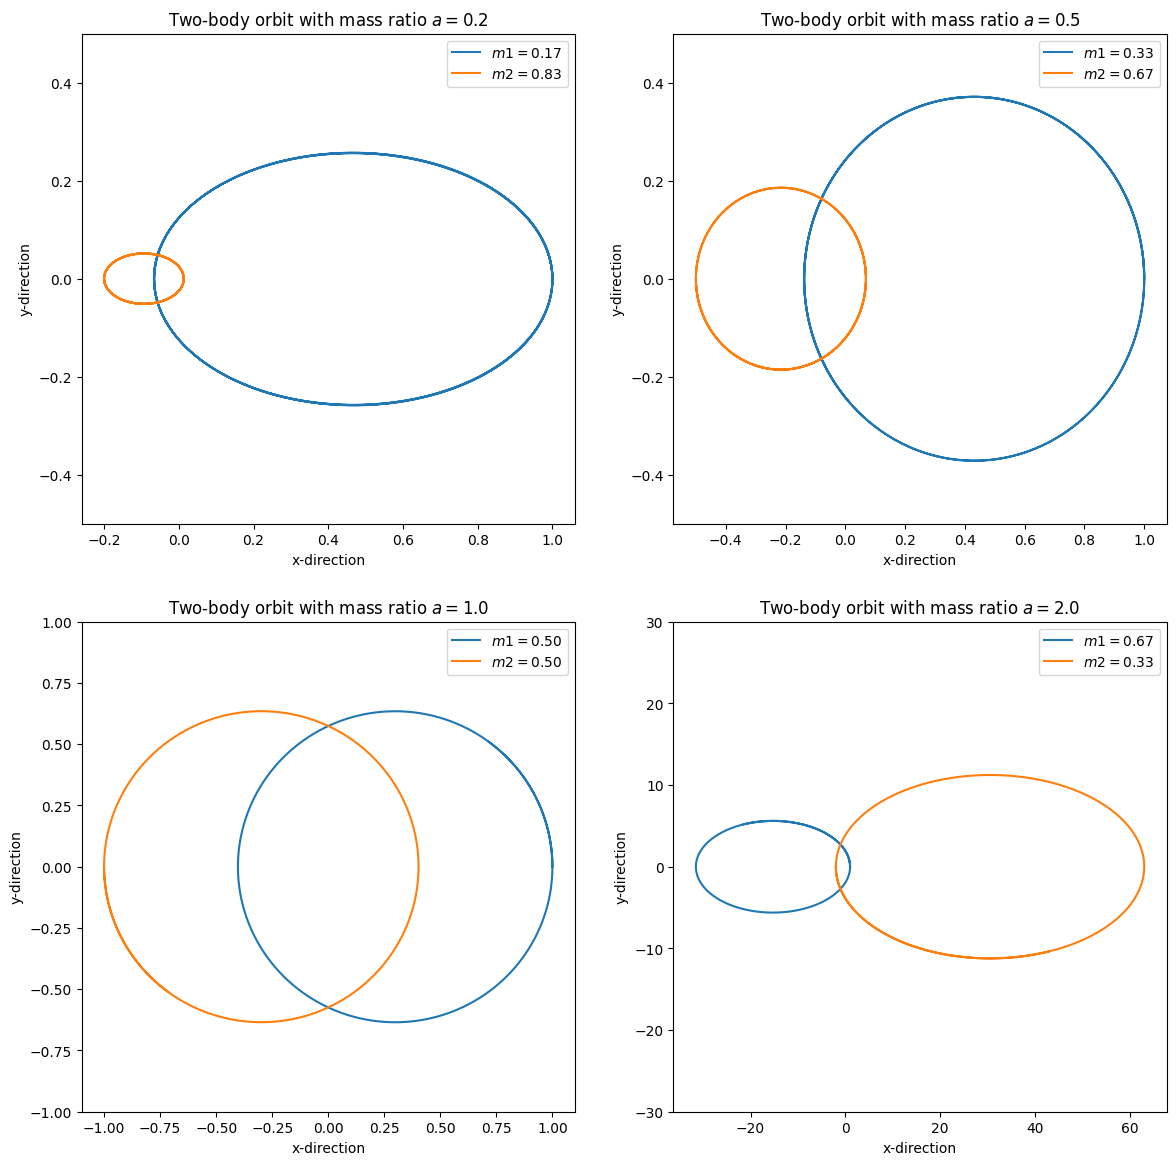

In [12]:
plt.clf()

#plots of orbit trajectories here

fig, axes = plt.subplots(2, 2, figsize=(14,14))
axes=axes.flatten()

massratios = [0.2, 0.5, 1.0 ,2.0]
i = 0
for a in massratios: #loop through each a and make plots for them
    tau = 0.001
    T = 4*np.pi
    if a == 2.0:
        T = 800*np.pi #so complete orbit trajectories are shown
    
    delta_v = np.array([0, 0])
    r1s, v1s, r2s, v2s, m1, m2 = symplectic_euler(a, tau, T, delta_v)

    axes[i].plot(r1s[:, 0], r1s[:, 1], label = f"$m1={m1:.2f}$")
    axes[i].plot(r2s[:, 0], r2s[:, 1], label = f"$m2={m2:.2f}$")
    axes[i].set_xlabel("x-direction")
    axes[i].set_ylabel("y-direction")
    axes[i].set_title(f"Two-body orbit with mass ratio $a = {a}$")
    axes[i].legend()
    if a == 1.0:
        axes[i].set_ylim(-1, 1)
    elif a == 2.0:
        axes[i].set_ylim(-30, 30)
    else:
        axes[i].set_ylim(-0.5, 0.5)
    i+=1


<Figure size 640x480 with 0 Axes>

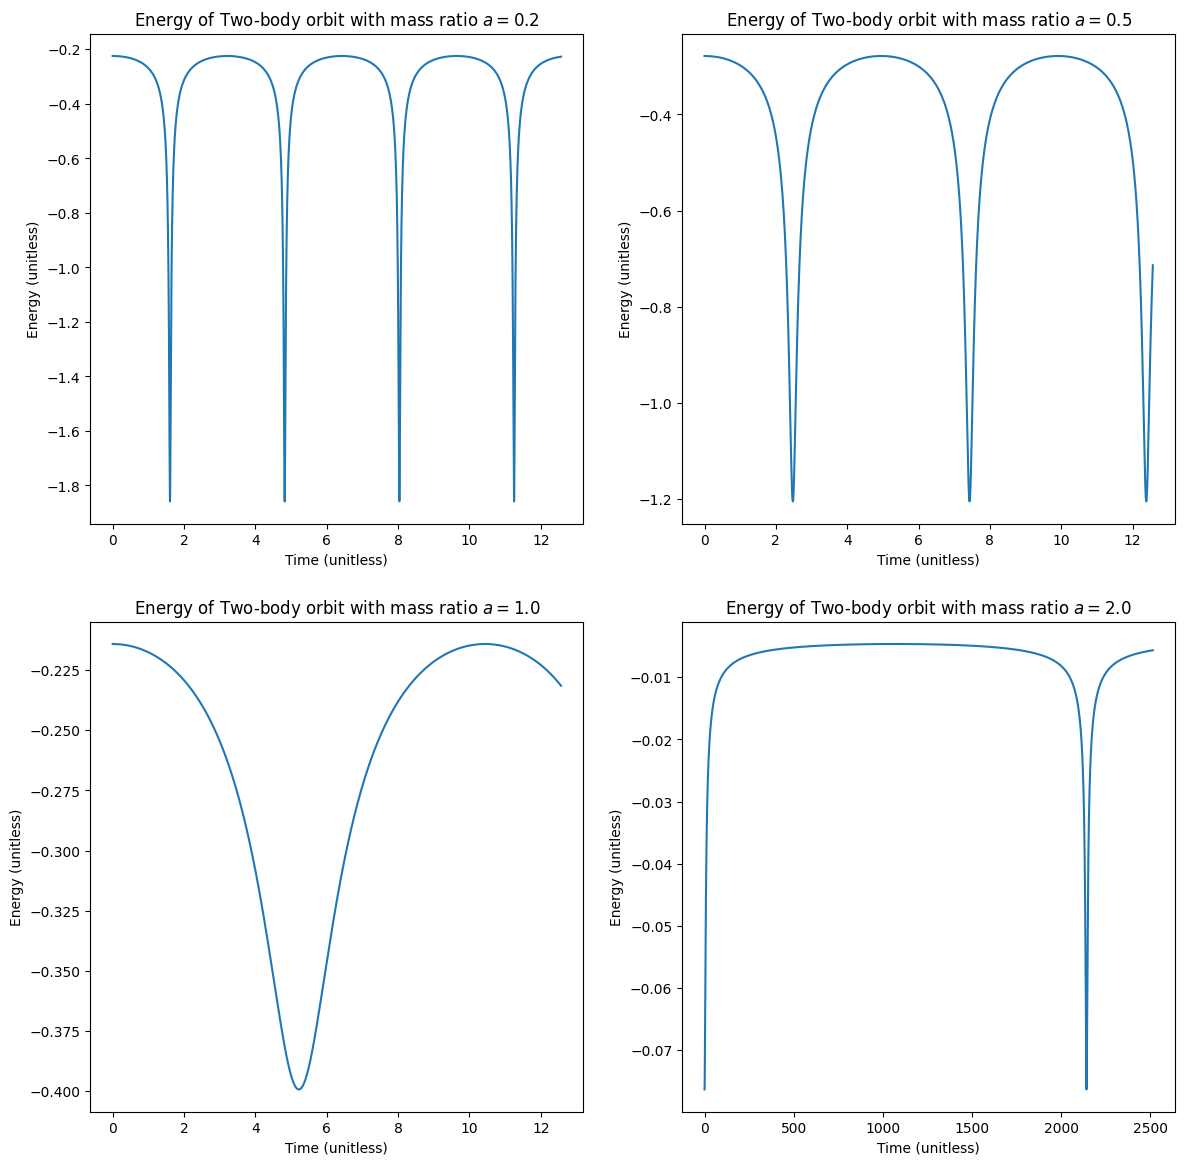

In [13]:
plt.clf()

#plots of energy drift here

fig, axes = plt.subplots(2, 2, figsize=(14,14))
axes=axes.flatten()

massratios = [0.2, 0.5, 1.0 ,2.0]
i = 0
for a in massratios: #loop through each a and make plots for them
    tau = 0.001
    T = 4*np.pi
    if a == 2.0:
        T = 800*np.pi #so complete orbit trajectories are shown
    
    delta_v = np.array([0, 0])
    r1s, v1s, r2s, v2s, m1, m2 = symplectic_euler(a, tau, T, delta_v)
    
    t = np.arange(0, T+tau, tau)
    r = r2s - r1s
    r = np.linalg.norm(r, axis = 1)
    energy = 0.5 * m1 * (v1s[:, 0]**2 + v1s[:, 1]**2) - G*m1*m2/r # U=T+V = kinetic + potential
    energy += 0.5 * m2 * (v2s[:, 0]**2 + v2s[:, 1]**2) - G*m1*m2/r

    axes[i].plot(t, energy)
    axes[i].set_xlabel("Time (unitless)")
    axes[i].set_ylabel("Energy (unitless)")
    axes[i].set_title(f"Energy of Two-body orbit with mass ratio $a = {a}$")
    
    i+=1

<Figure size 640x480 with 0 Axes>

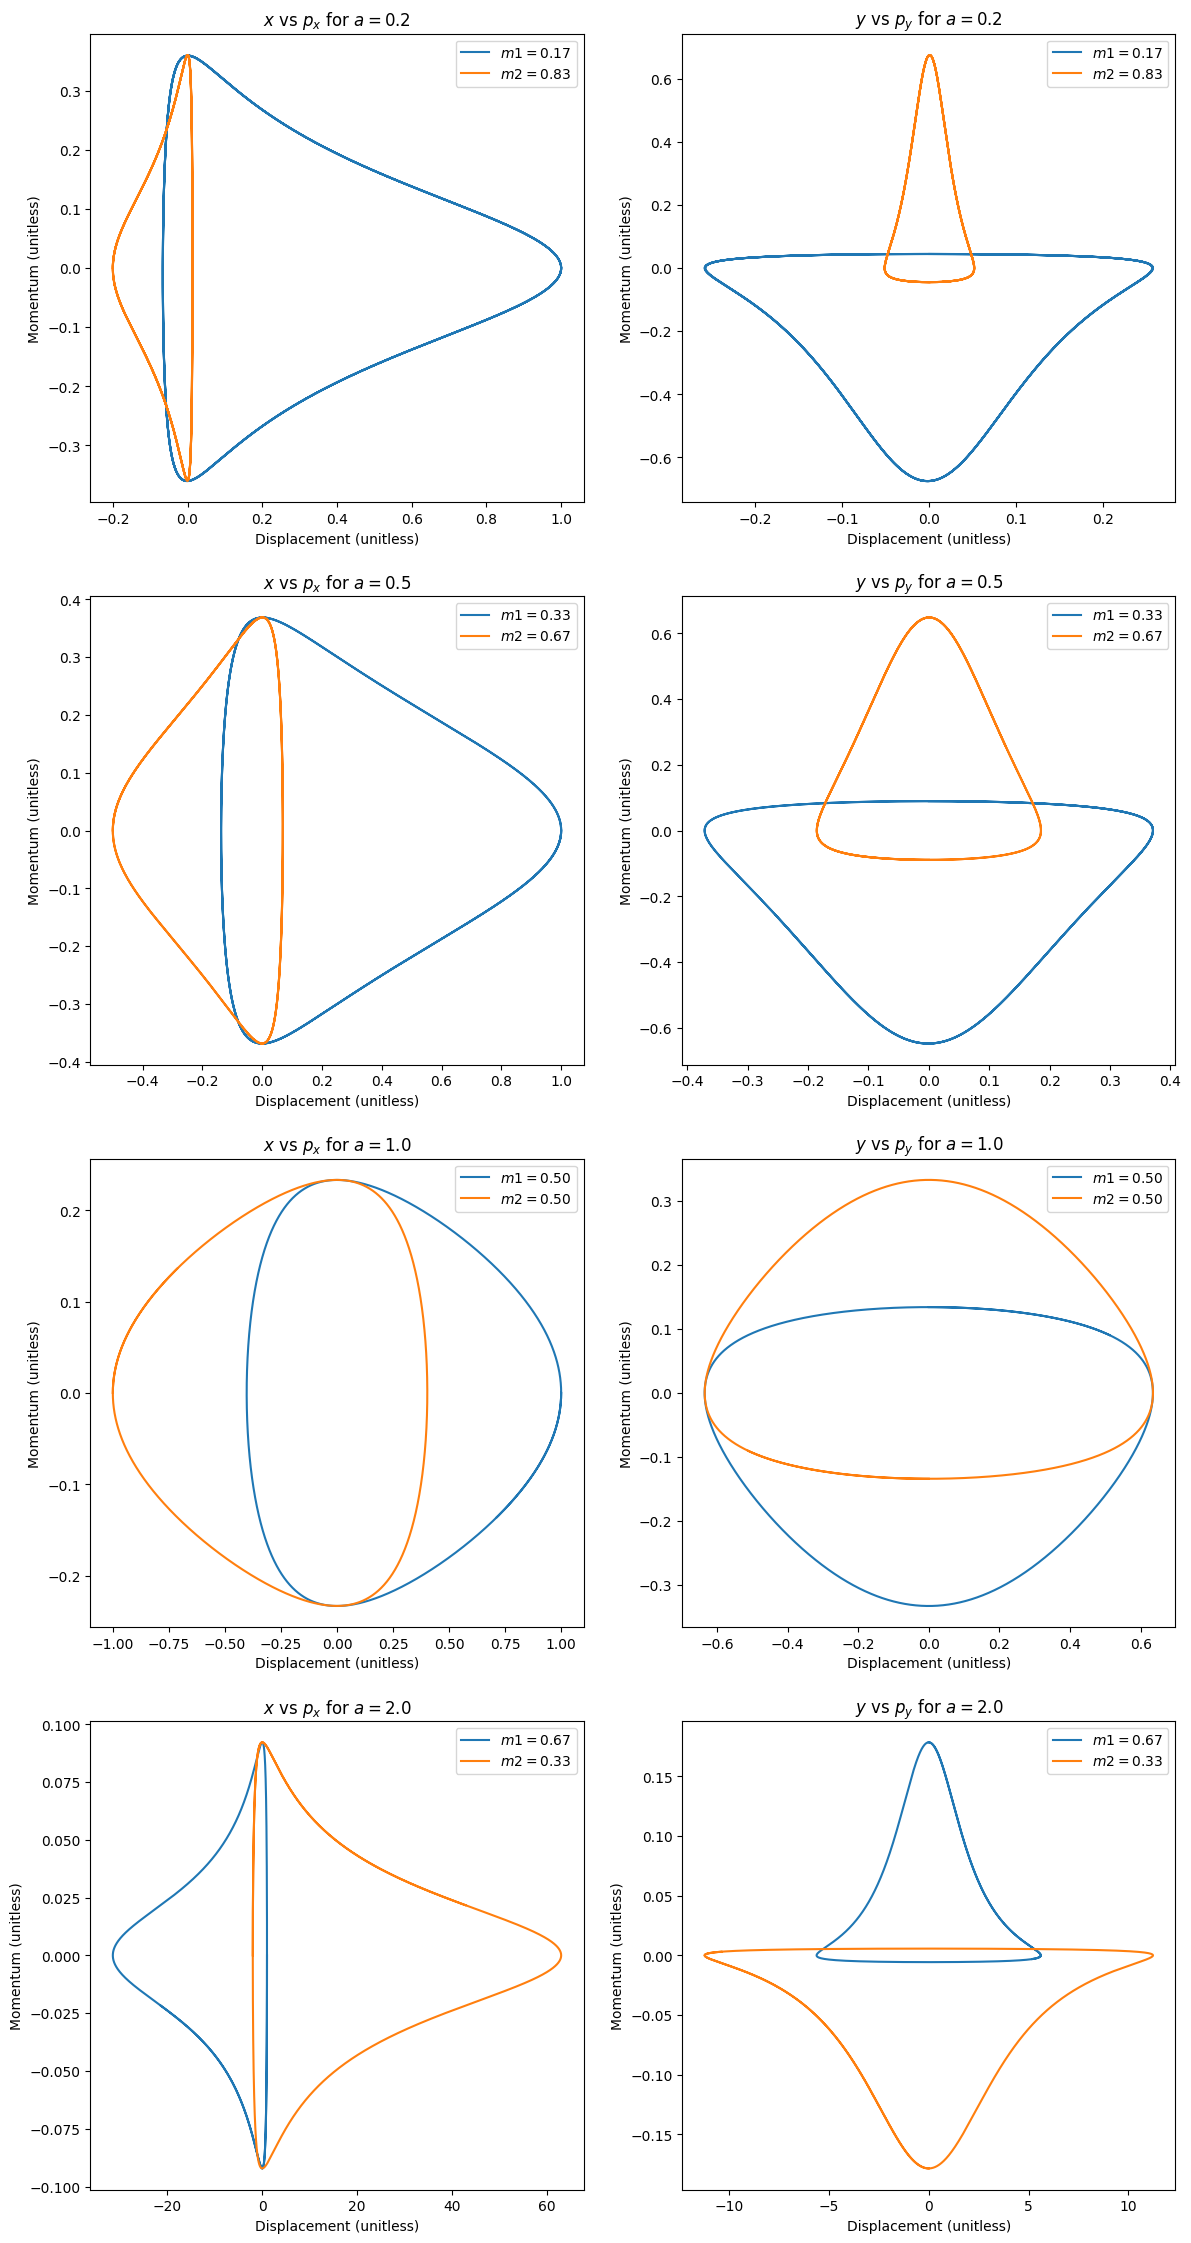

In [14]:
plt.clf()

#phase space plots

fig, axes = plt.subplots(4, 2, figsize=(14, 28))
axes = axes.flatten()

massratios = [0.2, 0.5, 1.0, 2.0]
i = 0
for a in massratios:
    tau = 0.001
    T = 4*np.pi
    if a == 2.0:
        T = 800*np.pi #so complete orbit trajectories are shown
    
    delta_v = np.array([0, 0])
    r1s, v1s, r2s, v2s, m1, m2 = symplectic_euler(a, tau, T, delta_v)
    
    axes[i].plot(r1s[:, 0], m1*v1s[:, 0], label=f"$m1={m1:.2f}$")
    axes[i].plot(r2s[:, 0], m2*v2s[:, 0], label=f"$m2={m2:.2f}$")
    axes[i].legend()
    axes[i].set_xlabel("Displacement (unitless)")
    axes[i].set_ylabel("Momentum (unitless)")
    axes[i].set_title(f"$x$ vs $p_x$ for $a = {a}$")

    axes[i+1].plot(r1s[:, 1], m1*v1s[:, 1], label=f"$m1={m1:.2f}$")
    axes[i+1].plot(r2s[:, 1], m2*v2s[:, 1], label=f"$m2={m2:.2f}$")
    axes[i+1].legend()
    axes[i+1].set_xlabel("Displacement (unitless)")
    axes[i+1].set_ylabel("Momentum (unitless)")
    axes[i+1].set_title(f"$y$ vs $p_y$ for $a = {a}$")

    i+=2

### iii. A plot with tau = 0.05, a = 0.5 and a perturbation of $\delta = 10^{-3}$:


Unperturbed and perturbed orbits are identical, as seen in the plots where they overlap. I.e., Sympletic Euler model of 2 body system is not sensitive to small perturbations.

(-1.0, 1.0)

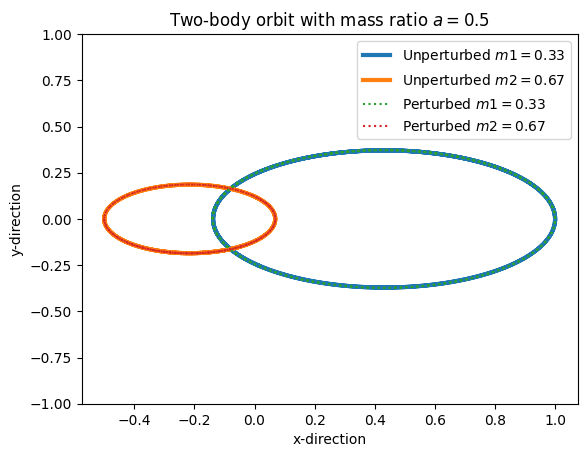

In [15]:
tau = 0.05
T = 2*np.pi #integration time
numSteps = int(np.ceil(T/tau))

#plotting unperturbed

a = 0.5
delta_v = np.array([0, 0])
tau = 0.001
T = 4*np.pi
r1s, v1s, r2s, v2s, m1, m2 = symplectic_euler(a, tau, T, delta_v)
plt.clf()
plt.plot(r1s[:, 0], r1s[:, 1], lw="3", label = f"Unperturbed $m1={m1:.2f}$")
plt.plot(r2s[:, 0], r2s[:, 1], lw="3", label = f"Unperturbed $m2={m2:.2f}$")

#perturbation in v
a = 0.5
delta_v = np.array([0, 1e-3])
tau = 0.001
T = 4*np.pi
r1s, v1s, r2s, v2s, m1, m2 = symplectic_euler(a, tau, T, delta_v)

plt.plot(r1s[:, 0], r1s[:, 1], ":", label = f"Perturbed $m1={m1:.2f}$")
plt.plot(r2s[:, 0], r2s[:, 1], ":", label = f"Perturbed $m2={m2:.2f}$")

plt.xlabel("x-direction")
plt.ylabel("y-direction")
plt.title(f"Two-body orbit with mass ratio $a = {a}$")
plt.legend()
plt.ylim(-1, 1)

### iv. 

Made plots of a=0.5 for three different tau values. Total integration time was $20\pi$. $\tau = 0.001$ is accurate with no deviations. We start to see deviations in orbit with $\tau = 0.01$, which is much more pronounced in $\tau=0.1$. Thus it is safe to say that time step size affects the performance of Symplectic Euler greatly in long-term integration, and it is best to have a low $\tau$.



Adaptive time-stepping in Symplectic model: At low time steps ($\tau = 0.001$), the model is less accurate than its fixed time-stepping version. However at larger time-steps, the model (although still inaccurate) seems to deviate far less than its fixed counterpart. Overall however, it is advisable to use fixed time stepping with Symplectic for the two body problem.



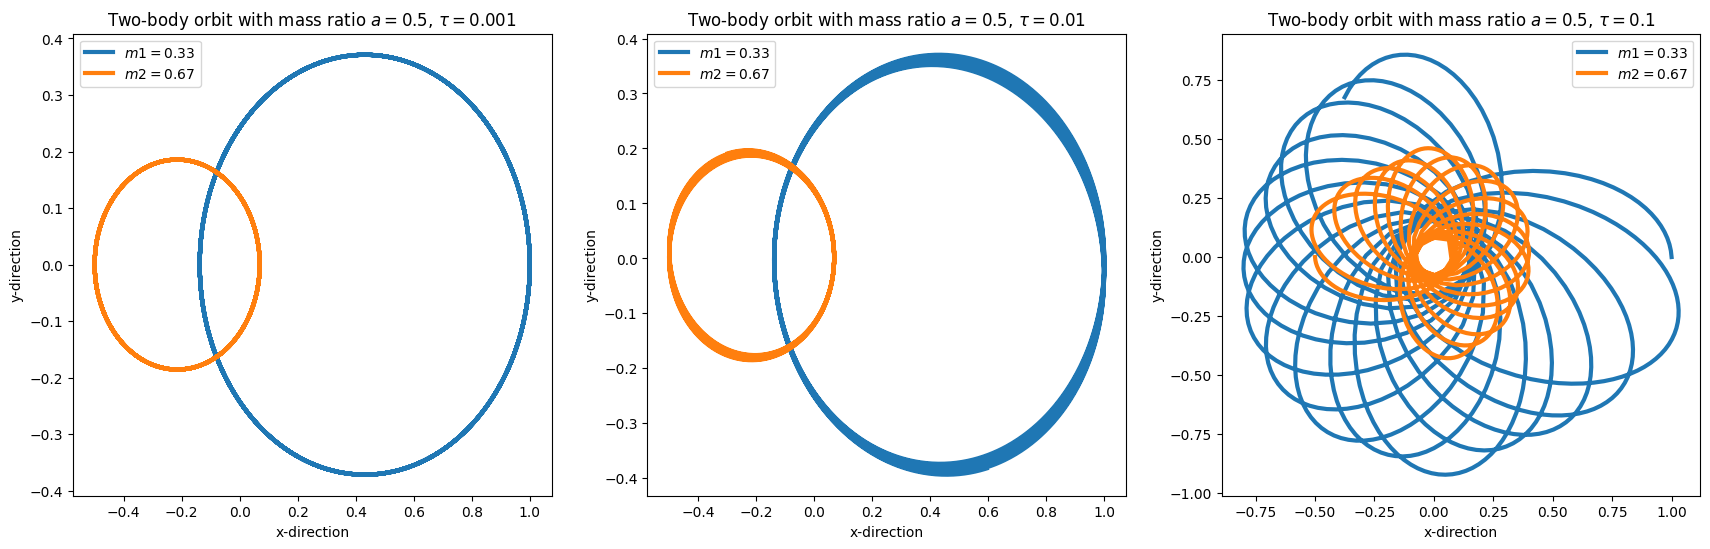

In [16]:
taus = [0.001, 0.01, 0.1]

fig, axes = plt.subplots(1, 3, figsize=(21, 6))

i = 0
for tau in taus: #loops through each tau and makes seperate orbit trajectories for them
    T = 20*np.pi #integration time
    numSteps = int(np.ceil(T/tau))

    a = 0.5
    delta_v = np.array([0, 0])
    r1s, v1s, r2s, v2s, m1, m2 = symplectic_euler(a, tau, T, delta_v)
    
    axes[i].plot(r1s[:, 0], r1s[:, 1], lw="3", label = f"$m1={m1:.2f}$")
    axes[i].plot(r2s[:, 0], r2s[:, 1], lw="3", label = f"$m2={m2:.2f}$")
    axes[i].set_xlabel("x-direction")
    axes[i].set_ylabel("y-direction")
    axes[i].set_title(f"Two-body orbit with mass ratio $a = {a}$, $\\tau={tau}$")
    axes[i].legend()
    
    i += 1

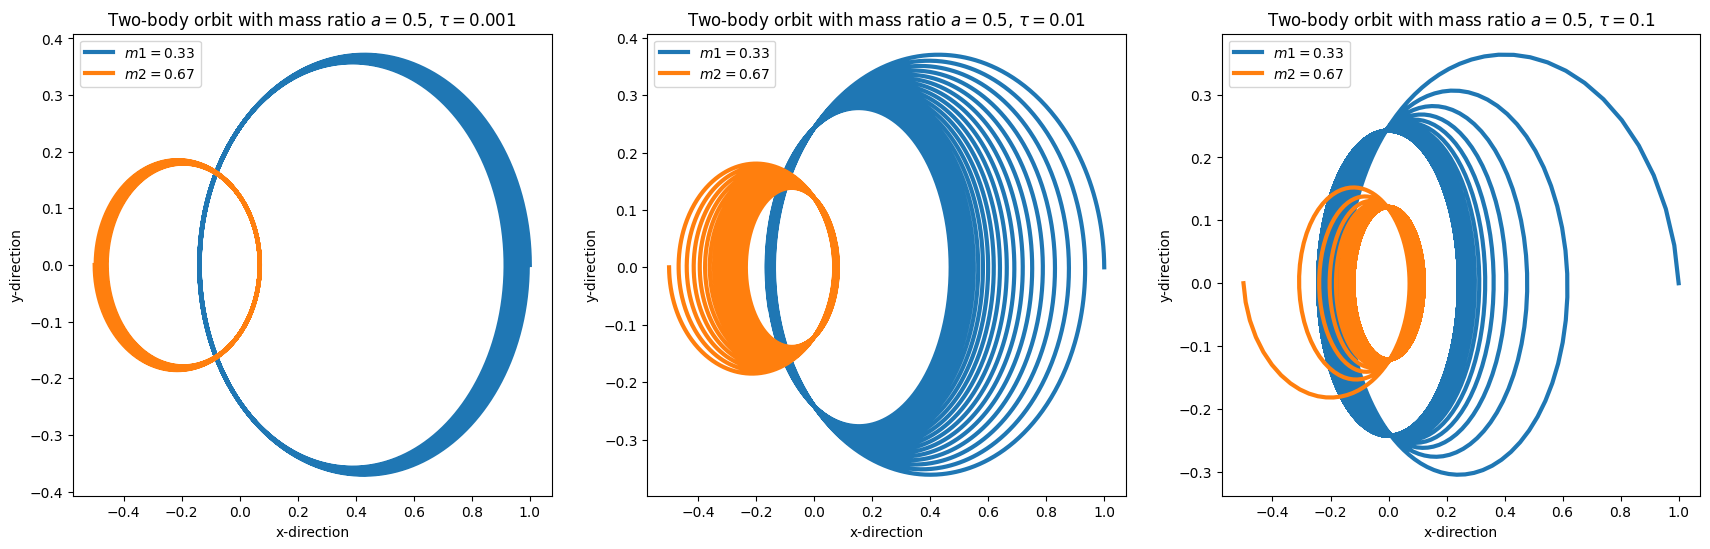

In [17]:
taus = [0.001, 0.01, 0.1]

fig, axes = plt.subplots(1, 3, figsize=(21, 6))

i = 0
for tau in taus:
    T = 20*np.pi #integration time
    t = 0 #for adaptive time stepping
    #done manually instead of calling function as we are implementing adaptive

    a = 0.5
    delta_v = np.array([0, 0])
    r1, v1, r2, v2, m1, m2 = initialize_perturbed_symplectic_euler(a, delta_v)

    # assuming a is normalised mass ratio
    G = 1

    r1s = [r1,]
    r2s = [r2,]
    v1s = [v1,]
    v2s = [v2,]

    while t < T:
        a1, a2 = acceleration(r1, r2, m1, m2, G)
        tau_n = tau / (np.linalg.norm(a1) + np.linalg.norm(a2))
        r1, v1, r2, v2 = symplectic_euler_step(r1, v1, r2, v2, m1, m2, G, tau_n)
        r1s.append(r1)
        v1s.append(v1)
        
        r2s.append(r2)
        v2s.append(v2)
        t += tau_n
        
    r1s = np.array(r1s)
    r2s = np.array(r2s)
    
    axes[i].plot(r1s[:, 0], r1s[:, 1], lw="3", label = f"$m1={m1:.2f}$")
    axes[i].plot(r2s[:, 0], r2s[:, 1], lw="3", label = f"$m2={m2:.2f}$")
    axes[i].set_xlabel("x-direction")
    axes[i].set_ylabel("y-direction")
    axes[i].set_title(f"Two-body orbit with mass ratio $a = {a}$, $\\tau={tau}$")
    axes[i].legend()
    
    i += 1

### v. 

Both symplectic Euler and Velocity Verlet have small oscillations in their energy. However since these are small and there is no drift, we can say that they conserve Energy in long term integration. The reason behind this is because they are both symplectic, and therefore preserves the geometric structure of the Hamiltonian. Note that as Velocity Verlet is a second-order integrator, it has smaller oscillations in energy.

In the case of angular momentum, symplectic euler does not strictly conserve it, but errors can remain small if the timestep is reasonable. However, the velocity verlet method exactly conserves angular momentum for central force problems (like Kepler orbits), and the error comes down to machine precision.

# B. Heat diffusion

### i.

The given anisotropic diffusion equation is:
\begin{equation}
\frac{\partial T}{\partial t} = \kappa_x \frac{\partial^2 T}{\partial x^2} + \kappa_y \frac{\partial^2 T}{\partial y^2}
\end{equation}

To extend the FTCS (Forward Time Centered Space) scheme:

Discretize time with forward difference:
\begin{equation}
\frac{\partial T}{\partial t} \approx \frac{T_{i,j}^{n+1} - T_{i,j}^n}{\Delta t}
\end{equation}

Discretize spatial derivatives with centered differences:
\begin{equation}
\frac{\partial^2 T}{\partial x^2} \approx \frac{T_{i+1,j}^n - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta x^2} \\
\end{equation}

\begin{equation}
\frac{\partial^2 T}{\partial y^2} \approx \frac{T_{i,j+1}^n - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta y^2}
\end{equation}


The resulting numerical scheme is:
\begin{equation}
T_{i,j}^{n+1} = T_{i,j}^n + \Delta t\left[\kappa_x\frac{T_{i+1,j}^n - 2T_{i,j}^n + T_{i-1,j}^n}{\Delta x^2} + \kappa_y\frac{T_{i,j+1}^n - 2T_{i,j}^n + T_{i,j-1}^n}{\Delta y^2}\right]
\end{equation}

Boundary conditions:
\begin{equation}
    T^n_{0,j} = 0, T^n_{i,0} = 0, T^n_{i,L} = 0, T^n_{L,j} = 0
\end{equation}

### ii.

Assume a solution of the form:
\begin{equation}
T_{i,j}^n = \xi^n e^{i(k_x i\Delta x + k_y j\Delta y)}
\end{equation}

Substitute into the numerical scheme and simplify:
\begin{equation}
\xi = 1 + \frac{\kappa_x \Delta t}{\Delta x^2}(e^{ik_x \Delta x} - 2 + e^{-ik_x \Delta x}) + \frac{\kappa_y \Delta t}{\Delta y^2}(e^{ik_y \Delta y} - 2 + e^{-ik_y \Delta y})
\end{equation}

Using trigonometric identities:
\begin{equation}
\xi = 1 - 4\frac{\kappa_x \Delta t}{\Delta x^2}\sin^2\left(\frac{k_x \Delta x}{2}\right) - 4\frac{\kappa_y \Delta t}{\Delta y^2}\sin^2\left(\frac{k_y \Delta y}{2}\right)
\end{equation}

For stability, we require $|\xi| \leq 1$:
\begin{equation}
-1 \leq 1 - 4\frac{\kappa_x \Delta t}{\Delta x^2}\sin^2\left(\frac{k_x \Delta x}{2}\right) - 4\frac{\kappa_y \Delta t}{\Delta y^2}\sin^2\left(\frac{k_y \Delta y}{2}\right) \leq 1
\end{equation}

The right inequality is always satisfied. The left inequality gives:
\begin{equation}
\frac{\kappa_x \Delta t}{\Delta x^2} + \frac{\kappa_y \Delta t}{\Delta y^2} \leq \frac{1}{2}
\end{equation}


Final stability requirement:
\begin{equation}
\Delta t \leq \frac{1}{2\left(\frac{\kappa_x}{\Delta x^2} + \frac{\kappa_y}{\Delta y^2}\right)}
\end{equation}

### iii.

#### Stability Implications:
The stability condition is governed by the more restrictive direction (higher $\kappa$/smaller $\Delta$). When $\kappa_x \gg \kappa_y$, the scheme is limited by the $x$-direction stability requirement. The time step must accommodate the fastest diffusion process.

#### Accuracy Implications:
Different diffusion rates in $x$ and $y$ can lead to anisotropic numerical errors. The numerical solution may develop direction-dependent artifacts. The effective numerical diffusion may differ between directions, potentially distorting the physical behavior.

### iv.

"\n#For animation\n%matplotlib widget \nplt.clf()\nframes, nsteps = anisotropic_diffusion(kx=0.1, ky=0.5, T = 0.1)\n# Plot results\nfig, ax = plt.subplots(figsize=(10, 6))\nax.set_xlabel('x')\nax.set_ylabel('y')\nims = []\nfor i in range(nsteps):\n    im = ax.imshow(frames[i], animated=True, vmin =0, vmax = 1)\n    if i == 0:\n        ax.imshow(frames[0])  # show an initial one first\n\n    ims.append([im])\n\nani = animation.ArtistAnimation(fig, ims, interval=10, blit=True,\n                            repeat_delay=200)\n"

<Figure size 640x480 with 0 Axes>

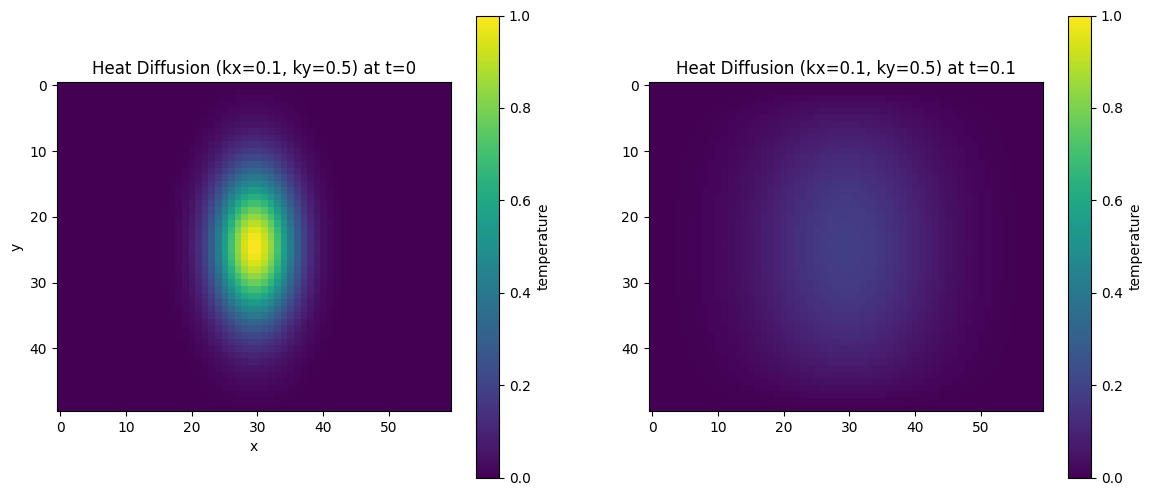

In [18]:
import matplotlib.animation as animation

def anisotropic_diffusion(kx, ky, Lx=1, Ly=1, Nx=60, Ny=50, T=0.1):
    '''
    Simulates anisotropic diffusion. kx is kappa_x, ky is kappa_y. T is time.
    '''
    # Set up grid
    dx = Lx/Nx
    dy = Ly/Ny
    dt = 0.9/(2*(kx/dx**2 + ky/dy**2))  # Safety factor 0.9
    
    # Initial condition - anisotropic Gaussian
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    X, Y = np.meshgrid(x, y) #messhing to create 2d image
    T_curr = np.exp(-((X-0.5)**2/0.01 + (Y-0.5)**2/0.05)) #anisiotropic gaussian spike
    
    #initial boundary conditions
    # Note that the in the index [j, i], j is the y coordinate and i is the x
    T_curr[0, :] = np.zeros(Nx) 
    T_curr[:, 0] = np.zeros(Ny)
    T_curr[-1, :] = np.zeros(Nx)
    T_curr[:, -1] = np.zeros(Ny)
    
    '''
    # Construct the matriices associated with the second spatial
    # derivatives and the boundary conditions
    Dx = -2 * np.eye(Nx)
    Dx = Dx + np.diag(np.ones(Nx-1), 1) + np.diag(np.ones(Nx-1), -1)
    Dx = kx * dt * Dx / dx**2
    
    # Impose the Dirichlet boundary conditions
    Dx[0, :] = np.zeros(Nx)
    Dx[Nx-1, :] = np.zeros(Nx)
    
    Dy = -2 * np.eye(Ny)
    Dy = Dy + np.diag(np.ones(Ny-1), 1) + np.diag(np.ones(Ny-1), -1)
    Dy = ky * dt * Dy / dy**2
    
    # Impose the Dirichlet boundary conditions
    Dy[0, :] = np.zeros(Ny)
    Dy[Ny-1, :] = np.zeros(Ny)
    
    D = Dx + Dy
    
    #D_x, D_y = np.meshgrid(Dx, Dy)
    ''' # couldn't get matrices to work
    
    frames = [T_curr,]
    
    # Time stepping
    nsteps = int(T/dt)
    for n in range(nsteps):
        T_curr = frames[-1]
        T_next = frames[-1].copy()
        
        T_next[1:-1,1:-1] = T_curr[1:-1,1:-1] + (
            ky*dt/dy**2 * (T_curr[2:,1:-1] - 2*T_curr[1:-1,1:-1] + T_curr[:-2,1:-1]) + 
            kx*dt/dx**2 * (T_curr[1:-1,2:] - 2*T_curr[1:-1,1:-1] + T_curr[1:-1,:-2]))
        # Essentially replicates the discretised diffusion equation
        # Boundary conditions
        T_next[0, :] = np.zeros(Nx)
        T_next[:, 0] = np.zeros(Ny)
        T_next[-1, :] = np.zeros(Nx)
        T_next[:, -1] = np.zeros(Ny)
        
        frames.append(T_next.copy())
    
    return frames, nsteps

frames, nsteps = anisotropic_diffusion(kx=0.1, ky=0.5, T = 0.1)

plt.clf()

fig, axes = plt.subplots(1, 2, figsize = (14,6))
#plotting initial condition at t=0
im = axes[0].imshow(frames[0], vmin =0, vmax = 1)
axes[0].set_title(f"Heat Diffusion (kx={0.1}, ky={0.5}) at t={0}")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
#plotting final conditon at t= 0.1
im2=axes[1].imshow(frames[-1], vmin =0, vmax = 1)
axes[1].set_title(f"Heat Diffusion (kx={0.1}, ky={0.5}) at t={0.1}")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
fig.colorbar(im, label="temperature")
fig.colorbar(im2, label="temperature")

'''
#For animation
%matplotlib widget 
plt.clf()
frames, nsteps = anisotropic_diffusion(kx=0.1, ky=0.5, T = 0.1)
# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')
ims = []
for i in range(nsteps):
    im = ax.imshow(frames[i], animated=True, vmin =0, vmax = 1)
    if i == 0:
        ax.imshow(frames[0])  # show an initial one first

    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True,
                            repeat_delay=200)
'''